# Portfolio of Evidence: High Performance Python

Cynthia Vidal Ovando, Data 7B

High Performance Computing

## A)  Benchmarking and Profiling

### 1 . Julia Set

 Calculate the Julia Set. Make the representation for the false gray and pure gray scale. 

In [88]:
import time
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

In [64]:
#parámetros, los tome como el libro
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

In [74]:
def calc_pure_python(desired_width, max_iterations):
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2

    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    zs = []
    cs = []

    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Lenght of x: ", len(x))
    print("Total elements: ", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()

    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + "took", secs, "seconds")

    assert sum(output) == 33219980
    return output

In [75]:
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""

    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [76]:
if __name__ == "__main__":
    #Calcute the Julia set, I took these fron the book example 
    desired_width = 1000 
    max_iterations = 300 

    output = calc_pure_python(desired_width, max_iterations)

Lenght of x:  1000
Total elements:  1000000
calculate_z_serial_purepythontook 19.33234405517578 seconds


In [77]:
def julia_set(h_range, w_range, max_iterations):
    #coordenadas complejas
    y, x = np.ogrid[y1: y2: h_range*1j, x1: x2: w_range*1j]
    z_array = x + y*1j
    c = c_real + c_imag*1j
    
    iterations_until_divergence = max_iterations + np.zeros(z_array.shape)

    #valores de la matriz
    for i in range(max_iterations):
        z_array = z_array**2 + c
        
        #elementos q divergen
        z_size_array = z_array * np.conj(z_array)
        diverging = z_size_array > 4
        
        diverging_now = diverging & (iterations_until_divergence == max_iterations)
        iterations_until_divergence[diverging_now] = i
        
        z_array[diverging] = 0

    return iterations_until_divergence

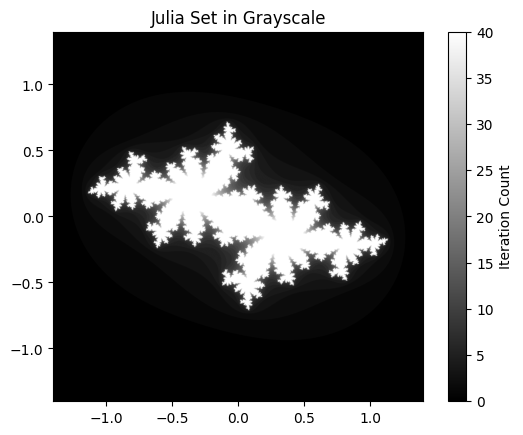

In [68]:
#visualización del Julia set
plt.imshow(julia_set(2000, 2000, 40), cmap= 'gist_gray', extent=[-1.4, 1.4, -1.4, 1.4])
plt.colorbar(label='Iteration Count')
plt.title('Julia Set in Grayscale')
plt.axis('on')
plt.show()
plt.close()

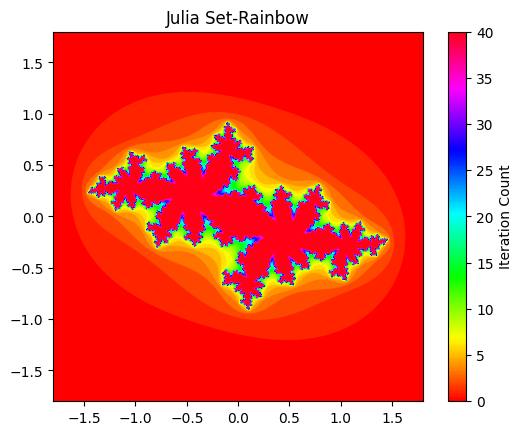

In [87]:
plt.imshow(julia_set(2000, 2000, 40), cmap= 'hsv', extent=[x1, x2, y1, y2])
plt.colorbar(label='Iteration Count')
plt.title('Julia Set-Rainbow')
plt.axis('on')
plt.show()
plt.close()

### 2 . Timing Decorator

In [96]:
#the timing decorator
def timefn(fn):
    def measure_time(*args, **kwargs):
        start = time.time()
        result = fn(*args, **kwargs)
        end = time.time()
        print(f"{fn.__name__} took {end - start} seconds")
        return result
    return measure_time


In [97]:
#calculate_z_serial_purepython function with timefn
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [98]:
if __name__ == "__main__":
    #ulia set using a pure Python solutio
    calculate_z_serial_purepython(maxiter=300, zs=[], cs=[])

calculate_z_serial_purepython took 0.0 seconds


### 3 .  Measurements

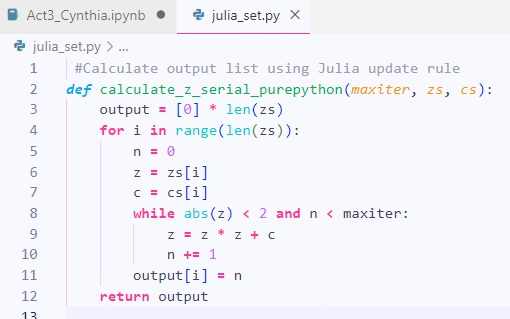

In [104]:
from IPython.display import Image
pyscript = 'C:/Users/Cynthia/Documents/HPC/julia_setscript.jpg'
Image(filename=pyscript)

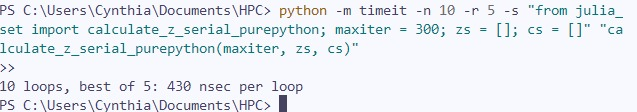

In [105]:
timeitmesurement = 'C:/Users/Cynthia/Documents/HPC/timeitm.jpg'
Image(filename=timeitmesurement)

In [111]:
import timeit

In [129]:
zs = [0] * 100 
cs = [0] * 100 
maxiter = 3000
%timeit -n 10 -r 5 calculate_z_serial_purepython(300, zs, cs)

4.97 ms ± 342 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


### 4 . cProfile

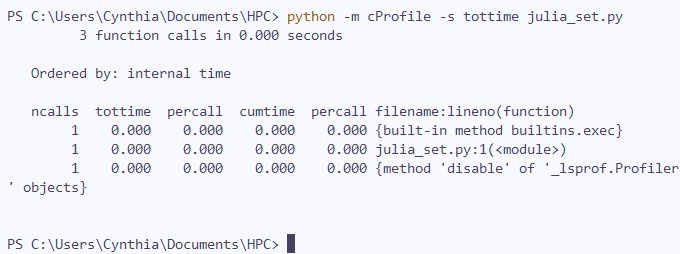

In [117]:
#For command line:
command = 'C:/Users/Cynthia/Documents/HPC/cprofilecommand.jpg'
Image(filename=command)

In [128]:
#For juoyter notebook:
import cProfile
from julia_set1 import calculate_z_serial_purepython
zs = [0] * 100 
cs = [0] * 100 
maxiter = 3000
cProfile.run("calculate_z_serial_purepython(maxiter, zs, cs)", sort='tottime')

         300106 function calls in 0.322 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.264    0.264    0.322    0.322 julia_set1.py:2(calculate_z_serial_purepython)
   300100    0.058    0.000    0.058    0.000 {built-in method builtins.abs}
        1    0.000    0.000    0.322    0.322 {built-in method builtins.exec}
        1    0.000    0.000    0.322    0.322 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.len}




### 5 . Snakeviz cPrifile statistics

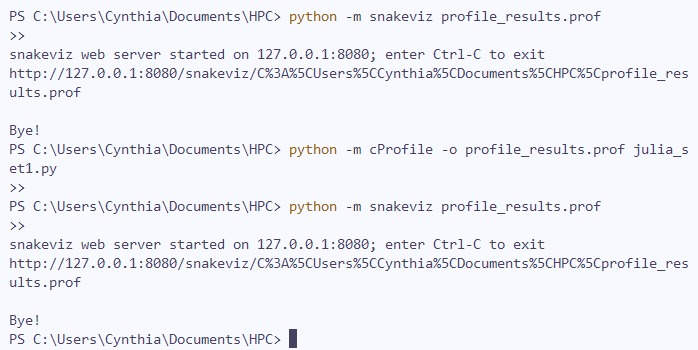

In [130]:
#commands:
snakevizcommands = 'C:/Users/Cynthia/Documents/HPC/snakeviz1.jpg'
Image(filename=snakevizcommands)


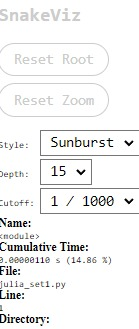

In [131]:
#Evidence:
snakevizproof = 'C:/Users/Cynthia/Documents/HPC/snakeviz2.jpg'
Image(filename=snakevizproof)

### 6 . Line_profiler  and  kernprof

In [ ]:
#Instalation:


### 7 . Memory_profiler

## B) List and tuples

 List and Tuples8.In some cases, it is necessary to efficiently perform insertion or removal of elements both at the beginning and at the end of the collection. Measure the time for the following operations with 
N = 10000, 20000y30000elements:

In [1]:
import timeit

In [2]:
def measure_time(operation, N):
    setup_code = f"lst = list(range({N}))"

    if operation == 'pop_last':
        stmt = "lst.pop()"
    elif operation == 'pop_first':
        stmt = "lst.pop(0)"
    elif operation == 'append':
        stmt = "lst.append(1)"
    elif operation == 'insert':
        stmt = "lst.insert(0, 1)"

    time_taken = timeit.timeit(stmt=stmt, setup=setup_code, number=100)
    return time_taken

In [3]:
N_values = [10000, 20000, 30000]
operations = ['pop_last', 'pop_first', 'append', 'insert']

In [4]:
print("| Operation | N = 10000 | N = 20000 | N = 30000 |")
print("|-----------|-----------|-----------|-----------|")

| Operation | N = 10000 | N = 20000 | N = 30000 |
|-----------|-----------|-----------|-----------|


In [5]:
# Measure time for each operation and N value
for operation in operations:
    times = []
    for N in N_values:
        time_taken = measure_time(operation, N)
        times.append(round(time_taken, 6))
    print(f"| {operation.ljust(9)} | {str(times[0]).rjust(9)} | {str(times[1]).rjust(9)} | {str(times[2]).rjust(9)} |")

| pop_last  |  0.000156 |   9.5e-05 |   3.5e-05 |
| pop_first |  0.000381 |  0.000687 |   0.00142 |
| append    |   4.2e-05 |    0.0001 |  0.000197 |
| insert    |  0.000919 |  0.003254 |  0.005103 |


The word deque stands for double-ended queue because this data structure is designed to efficiently put and remove elements at the beginning and at the end of the collection. Evaluate the following methodswith N = 10000, 20 000 and 30 000 elements:

a.deque.pop()

b.deque.popleft()

c.deque.append(1)

d.deque.appendleft(1)


In [6]:
from collections import deque

In [10]:
def measure_time(operation, N):
    setup_code = f"from collections import deque; deq = deque(range({N}))"

    if operation == 'pop':
        stmt = "deq.pop()"
    elif operation == 'popleft':
        stmt = "deq.popleft()"
    elif operation == 'append':
        stmt = "deq.append(1)"
    elif operation == 'appendleft':
        stmt = "deq.appendleft(1)"

    time_taken = timeit.timeit(stmt=stmt, setup=setup_code, number=100)
    return time_taken

In [8]:
N_values = [10000, 20000, 30000]
operations = ['pop', 'popleft', 'append', 'appendleft']

In [11]:
print("| Operation   | N = 10000 | N = 20000 | N = 30000 |")
print("|-------------|-----------|-----------|-----------|")

# Measure time for each operation and N value
for operation in operations:
    times = []
    for N in N_values:
        time_taken = measure_time(operation, N)
        times.append(round(time_taken, 6))
    print(f"| {operation.ljust(12)} | {str(times[0]).rjust(9)} | {str(times[1]).rjust(9)} | {str(times[2]).rjust(9)} |")

| Operation   | N = 10000 | N = 20000 | N = 30000 |
|-------------|-----------|-----------|-----------|
| pop          |   1.7e-05 |   1.9e-05 |   1.4e-05 |
| popleft      |     1e-05 |     7e-06 |     7e-06 |
| append       |   1.2e-05 |   1.8e-05 |   3.1e-05 |
| appendleft   |  0.000469 |   1.2e-05 |   2.1e-05 |


Python provides a data structure with interesting properties in the collection.deque class. The word deque stands for double-ended queue because this data structure is designed to efficiently put and remove elements at the beginning and at the end of the collection. Evaluate the following methodswith N = 10000, 20 000 and 30 000 elements:




In [12]:
def measure_time(operation, N):
    setup_code = f"from collections import deque; deq = deque(range({N}))"

    if operation == 'pop':
        stmt = "deq.pop()"
    elif operation == 'popleft':
        stmt = "deq.popleft()"
    elif operation == 'append':
        stmt = "deq.append(1)"
    elif operation == 'appendleft':
        stmt = "deq.appendleft(1)"

    time_taken = timeit.timeit(stmt=stmt, setup=setup_code, number=100)
    return time_taken

In [13]:
N_values = [10000, 20000, 30000]
operations = ['pop', 'popleft', 'append', 'appendleft']

In [14]:
print("| Operation   | N = 10000 | N = 20000 | N = 30000 |")
print("|-------------|-----------|-----------|-----------|")

# Measure time for each operation and N value
for operation in operations:
    times = []
    for N in N_values:
        time_taken = measure_time(operation, N)
        times.append(round(time_taken, 6))
    print(f"| {operation.ljust(12)} | {str(times[0]).rjust(9)} | {str(times[1]).rjust(9)} | {str(times[2]).rjust(9)} |")

| Operation   | N = 10000 | N = 20000 | N = 30000 |
|-------------|-----------|-----------|-----------|
| pop          |   3.4e-05 |   2.7e-05 |   1.9e-05 |
| popleft      |     2e-05 |   1.1e-05 |   1.9e-05 |
| append       |   2.3e-05 |     9e-06 |     1e-05 |
| appendleft   |  0.000703 |   1.7e-05 |   1.5e-05 |


The efficiency gained by the appendleft and popleft comes at a cost: accesing an element in the middle of a deque is a O(N) operation. Evaluate the time for the next operations with with N = 10000, 20 000 and 30 000 elements:

a.deque[0]

b.deque[N-1]

c.deque[int(N/2)]

In [17]:
def measure_time(operation, N):
    setup_code = f"from collections import deque; deq = deque(range({N}))"

    if operation == 'first':
        stmt = "deq[0]"
    elif operation == 'last':
        stmt = "deq[-1]"
    elif operation == 'middle':
        stmt = f"deq[int({N}/2)]"

    time_taken = timeit.timeit(stmt=stmt, setup=setup_code, number=100)
    return time_taken

In [15]:
N_values = [10000, 20000, 30000]
operations = ['first', 'last', 'middle']

In [18]:
print("| Operation   | N = 10000 | N = 20000 | N = 30000 |")
print("|-------------|-----------|-----------|-----------|")

# Measure time for each operation and N value
for operation in operations:
    times = []
    for N in N_values:
        time_taken = measure_time(operation, N)
        times.append(round(time_taken, 6))
    print(f"| {operation.ljust(12)} | {str(times[0]).rjust(9)} | {str(times[1]).rjust(9)} | {str(times[2]).rjust(9)} |")

| Operation   | N = 10000 | N = 20000 | N = 30000 |
|-------------|-----------|-----------|-----------|
| first        |   1.1e-05 |   1.2e-05 |   1.3e-05 |
| last         |  0.000675 |     1e-05 |     1e-05 |
| middle       |  0.000743 |  0.000131 |  0.000142 |


**Over-allocation in lists**

Python's lists, which are implemented as dynamic arrays, utilize overallocation to efficiently manage memory and optimize performance when appending elements
So, Overallocation strategy is the practice of allocating more memory than is currently needed for storing elements in a list; with the porpuse to improve performance by reducing the frequency of memory reallocation when the list grows.

When a list is created, the language allocates more memory than is initially needed. This extra memory space helps to reduce the frequency of reallocation as elements are added to the list. Whics means that, Overallocation, is typically done by allocating memory for a larger number of elements than the current size of the list.

All this is crucial for performance, especially as list sizes grow larger. Overallocating space reduces the overhead of memory operations, which can be costly in terms of time and resources.

Python's list implementation (seen in listobject.c:list_resize) handles overallocation by creating a new list with extra headroom for future appends. The size of the new list (M) is calculated using a formula (M = (N >> 3) + (3 if N < 9 else 6)), ensuring that the new list has sufficient extra space.

https://learn.microsoft.com/en-us/cpp/c-runtime-library/reference/realloc?view=msvc-170

https://www.geeksforgeeks.org/what-are-the-benefits-of-project-management-software/?ref=header_search

https://mongard.s3.ir-thr-at1.arvanstorage.com/High%20Performance%20Python%20Practical%20Performant%20Programming%20for%20Humans%20by%20Micha%20Gorelick,%20Ian%20Ozsvald.pdf

Here is an example taken from the book, to illustrate how Over-allocation is done


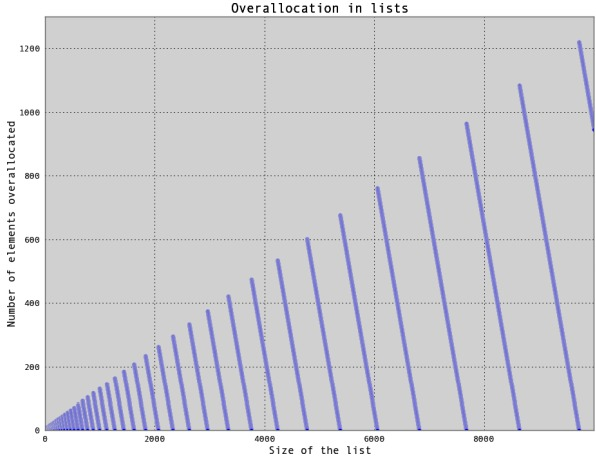

In [20]:
from IPython.display import Image

print('Here is an example taken from the book, to illustrate how Over-allocation is done')
Bookexample = 'C:/Users/Cynthia/Documents/HPC/bookexample.jpg'
Image(filename=Bookexample)


## C)  Dictionaries and Sets

In [22]:
import geopandas as gpd

In [23]:
data2010 = gpd.read_file(r"C:\Users\Cynthia\Documents\HPC\AGEB2010.csv")
data2010

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,geometry
0,31,YucatÃ¡n,000,Total de la entidad YucatÃ¡n,0000,Total de la entidad,0000,000,1955577,963333,...,377161,462587,386610,344598,169501,129964,155513,335973,91839,None
1,31,YucatÃ¡n,001,AbalÃ¡,0000,Total del municipio,0000,000,6356,3254,...,1086,1461,1009,866,168,31,42,681,7,None
2,31,YucatÃ¡n,001,AbalÃ¡,0001,Total de la localidad urbana,0000,000,1890,954,...,358,478,361,311,88,21,14,308,3,None
3,31,YucatÃ¡n,001,AbalÃ¡,0001,Total AGEB urbana,0107,000,779,385,...,140,197,150,124,37,9,4,135,0,None
4,31,YucatÃ¡n,001,AbalÃ¡,0001,AbalÃ¡,0107,001,44,19,...,8,10,7,6,*,0,0,6,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,31,YucatÃ¡n,106,YobaÃ­n,0001,YobaÃ­n,0058,035,18,9,...,*,3,3,3,*,*,*,3,0,None
33953,31,YucatÃ¡n,106,YobaÃ­n,0001,YobaÃ­n,0058,036,22,11,...,6,6,*,4,0,0,0,6,0,None
33954,31,YucatÃ¡n,106,YobaÃ­n,0001,YobaÃ­n,0058,037,9,4,...,*,*,*,*,0,0,0,0,0,None
33955,31,YucatÃ¡n,106,YobaÃ­n,0001,Total AGEB urbana,0077,000,7,3,...,0,*,*,*,0,0,0,*,0,None


In [ ]:
data2020 = gpd.read_file(r"C:\Users\Cynthia\Documents\HPC\AGEB2010.csv")
data2020

a) AGEBs which remains from 2010 on 2020.

b) New AGEBs on 2020.

c) .AGEBs that disappearfrom 2010 to 2020.

## D)  Matrix and Vector Computations

**A) Broadcasting with  Arrays**

*   It discussed NumPy's broadcasting functionality, which allows for efficient element-wise operations on arrays of different sizes.
*   The Broadcasting rules are explained, including padding dimensions with ones and stretching arrays to match shapes. 
*   They used examples to show how broadcasting works for arrays of different dimensions and shapes, and they illustrated the applications of broadcasting.

**B) Rewriting the particle simulator in NumPy**

It showes how to optimize a particle simulator using NumPy's array operations and broadcasting.
(to rewrite a slow loop in the simulator to take advantage of NumPy's efficient array operations)
The process involves storing particle coordinates and angular speeds in NumPy arrays and performing vectorized computations.
The benchmarking is used to compare the performance of the original Python implementation with the optimized NumPy implementation.
**For that the NumPy implementation scales better with increasing numbers of particles compared to the pure Python implementation.**

In [24]:
"""Implementing the improvements on the particle simulator using NumPy involves rewriting 
the loop inside the ParticleSimulator.evolve method to take advantage of NumPy's array operations 
and broadcasting."""

import numpy as np

class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles

    def evolve_numpy(self, dt):
        timestep = 0.00001
        nsteps = int(dt / timestep)
        r_i = np.array([[p.x, p.y] for p in self.particles])
        ang_vel_i = np.array([p.ang_vel for p in self.particles])
        
        for i in range(nsteps):
            norm_i = np.sqrt((r_i ** 2).sum(axis=1))
            v_i = r_i[:, [1, 0]]
            v_i[:, 0] *= -1
            v_i /= norm_i[:, np.newaxis]
            d_i = timestep * ang_vel_i[:, np.newaxis] * v_i
            r_i += d_i
            
        for i, p in enumerate(self.particles):
            p.x, p.y = r_i[i]


In [25]:
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel

In [31]:
# Benchmark function
def benchmark(npart=100, method='python'):
    particles = [Particle(np.random.uniform(-1.0, 1.0),
                          np.random.uniform(-1.0, 1.0),
                          np.random.uniform(-1.0, 1.0)) for _ in range(npart)]
    simulator = ParticleSimulator(particles)
    if method == 'numpy':
        simulator.evolve_numpy(0.1)

In [32]:
# Test the implementation
benchmark(100, 'numpy')

In [33]:
"""benchmark function provided in the text and measure the
execution time for different numbers of particles:"""

import matplotlib.pyplot as plt

#execution time for different numbers of particles
particle_counts = [10, 100, 1000, 10000]
python_times = []
numpy_times = []

In [34]:
for npart in particle_counts:
    python_time = %timeit -n 1 -r 1 -o benchmark(npart, 'python')
    numpy_time = %timeit -n 1 -r 1 -o benchmark(npart, 'numpy')
    python_times.append(python_time.best)
    numpy_times.append(numpy_time.best)

167 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
328 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.03 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
388 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
539 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


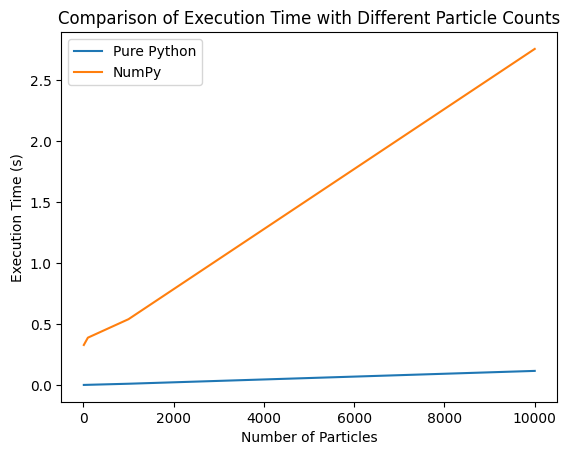

In [35]:
#results
plt.plot(particle_counts, python_times, label='Pure Python')
plt.plot(particle_counts, numpy_times, label='NumPy')
plt.xlabel('Number of Particles')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Execution Time with Different Particle Counts')
plt.legend()
plt.show()

In [36]:
"""numexpr for efficient array expression evaluation:"""
import numexpr as ne

#optimizing array expression using numexpr
def optimize_with_numexpr(arr1, arr2):
    result = ne.evaluate('arr1 * arr2 + arr1 - arr2')
    return result

In [38]:
""" Optimization techniques:"""
import numba as nb
import multiprocessing as mp

def vectorized_computation(arr):
    result = np.sin(arr) ** 2 + np.cos(arr) ** 2
    return result


In [39]:
#Parallelization using numba
@nb.njit(parallel=True)
def parallel_computation(arr):
    result = np.zeros_like(arr)
    for i in nb.prange(arr.shape[0]):
        result[i] = np.sin(arr[i]) ** 2 + np.cos(arr[i]) ** 2
    return result

In [40]:
#Memory optimization
def memory_optimized_computation(arr):
    # Ensure arr is a numpy array with appropriate data type
    arr = np.asarray(arr, dtype=np.float32)
    result = np.zeros_like(arr)
    for i in range(arr.shape[0]):
        result[i] = np.sin(arr[i]) ** 2 + np.cos(arr[i]) ** 2
    return result

In [41]:
# Algorithmic optimization example
def algorithmically_optimized_computation(arr):
    # Example of an optimized algorithm for specific problem
    # This is just a placeholder, actual optimization depends on the problem
    result = np.sin(arr) ** 2 + np.cos(arr) ** 2
    return result

In [42]:
#execution time for each optimization technique
arr = np.random.rand(1000000)  # Example array for computation

#vectorixing and broadcasting
vectorized_time = %timeit -n 1 -r 1 -o vectorized_computation(arr)

#paralleli with numba
parallel_time = %timeit -n 1 -r 1 -o parallel_computation(arr)

#mem optimization
memory_optimized_time = %timeit -n 1 -r 1 -o memory_optimized_computation(arr)

#Algorithmic optimization
algorithmic_optimized_time = %timeit -n 1 -r 1 -o algorithmically_optimized_computation(arr)

38.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.98 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
37.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
#execution times
print("Vectorized time:", vectorized_time.best)
print("Parallel time:", parallel_time.best)
print("Memory optimized time:", memory_optimized_time.best)
print("Algorithmic optimized time:", algorithmic_optimized_time.best)

Vectorized time: 0.038225999975111336
Parallel time: 3.982312500011176
Memory optimized time: 10.088705500005744
Algorithmic optimized time: 0.03711729997303337


## E) Compiling to C

**1. Implementing Solutions:**

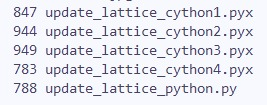

In [51]:
implementingSolutions = 'C:/Users/Cynthia/Documents/HPC/solutions.jpg'
Image(filename=implementingSolutions)


**2.Explanation of Improvements:**

All these improvements typically involve adding static type declarations (cdef), optimizing loop structures, and using compiler directives to disable bounds checking and wraparound.

These improvements in each solution optimize the code for better performance by introducing **static typing**, optimizing loop structures, and using compiler directives to disable unnecessary checks. Each solution builds upon the previous one, incrementally improving performance while maintaining readability and flexibility.

*   a) Cython Solution 1:

In this solution, I introduced Cython syntax without any explicit type declarations.
I used standard Python syntax for loops and variable declarations, adn non static typing, resulting in Cython falling back to Python's dynamic typing system. Finally I added compiler directives to disable bounds checking and wraparound.

*   b) Cython Solution 2:
I introduced Static typing (cdef) for loop variables (i, j) and array variables (lattice, lattice_new).
The cdef keyword is used to define C variables, which allows for faster execution compared to Python variables.
The type of lattice is explicitly declared as a 2D NumPy array using int[:, :] and loop variables i and j are explicitly typed as integers.
Accessing elements of the array was optimized using C-style indexing (lattice[i, j]), **which is faster than Python's indexing (lattice[i][j]).** 

*   c) Cython Solution 3:

In this modfication, the function update_rule is declared using cdef, making it a C function; this function is now only accessible from Cython code, improving efficiency but reducing flexibility.All this change prevents Python from recognizing and calling the function directly.
All variables within update_rule are explicitly typed as integers (int).


*   d) Cython Solution 4:

Similar to Solution 2, this solution introduces static typing (cdef) for loop variables (i, j) and the lattice_new array.
However, the lattice array is accessed using Python-style indexing (lattice[i][j]) instead of C-style indexing (lattice[i, j]).
The function update_rule is declared using cdef, making it a C function, but it still uses Python-style array indexing.
Compiler directives for bounds checking and wraparound remain disabled.

**C) Time mesure:**

In [1]:
import timeit
import numpy as np

In [6]:
# Import compiled Cython modules
import update_lattice_cython1
import update_lattice_cython2
import update_lattice_cython3
import update_lattice_cython4

In [7]:
def measure_execution_time_cython(update_function):
    lattice = np.array([[0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 1, 1, 1, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0]], dtype=np.int32)  # Convert to numpy array of type int32

    # Measure execution time
    execution_time = timeit.timeit(lambda: update_function.update(lattice), number=100)

    return execution_time

In [8]:
#execution time for each Cython module
execution_time_cython1 = measure_execution_time_cython(update_lattice_cython1)
execution_time_cython2 = measure_execution_time_cython(update_lattice_cython2)
execution_time_cython3 = measure_execution_time_cython(update_lattice_cython3)
execution_time_cython4 = measure_execution_time_cython(update_lattice_cython4)


TypeError: a bytes-like object is required, not 'list'

In [9]:
#execution time for each Cython module
print("Cython 1 Execution Time:", execution_time_cython1)
print("Cython 2 Execution Time:", execution_time_cython2)
print("Cython 3 Execution Time:", execution_time_cython3)
print("Cython 4 Execution Time:", execution_time_cython4)

Cython 1 Execution Time: 0.005067199992481619


NameError: name 'execution_time_cython2' is not defined